# Steps to anomaly detection

In [1]:
import pandas as pd
# from __future__ import division
import itertools
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import math
from sklearn import metrics
from random import randint
from matplotlib import style
import seaborn as sns

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import env

In [2]:
url = env.get_database("grocery_db")

sql = """
select *
from grocery_customers
"""



In [3]:
df = pd.read_sql(sql, url, index_col="customer_id")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
customer_id,,,,,,,,
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
dff = df[['Frozen', 'Grocery']] # selecting columns to cluster

In [5]:
np_array = dff.values.astype("float32", copy = False) # turning dff into an array

In [6]:
scaler = StandardScaler().fit(np_array) 
np_array = scaler.transform(np_array)



In [7]:
dbsc = DBSCAN(eps = .75, min_samples = 15).fit(np_array)

In [8]:
labels = dbsc.labels_

In [9]:
dff['labels'] = labels

<AxesSubplot:xlabel='Frozen', ylabel='Grocery'>

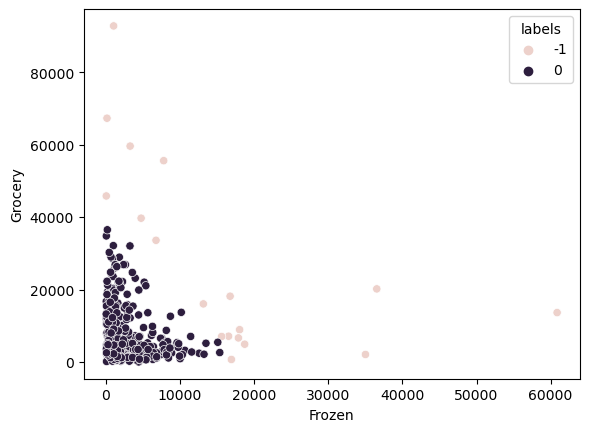

In [10]:
dff.labels.value_counts() 
sns.scatterplot(dff.Frozen, dff.Grocery, hue=dff.labels)


# DBSCAN from curriculum logs

In [11]:
df = pd.read_csv('wine_quality.csv')

In [12]:
df.head()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [13]:
df.isnull().sum()

Unnamed: 0              0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_type               0
dtype: int64

In [14]:
dff = df[['residual sugar', 'density']]
np_array = dff.values.astype("float32", copy = False)



In [15]:
scaler = StandardScaler().fit(np_array) 
np_array = scaler.transform(np_array)


In [16]:
dbsc = DBSCAN(eps = .75, min_samples = 15).fit(np_array)
labels = dbsc.labels_


In [17]:
dff['labels'] = labels
dff.labels.value_counts()


 0    6492
-1       5
Name: labels, dtype: int64

<AxesSubplot:xlabel='density', ylabel='residual sugar'>

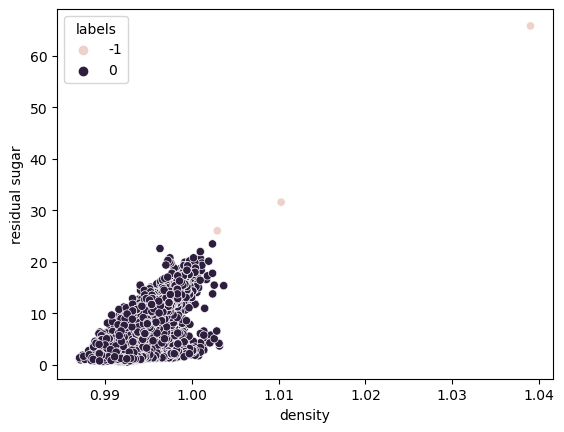

In [18]:
sns.scatterplot(dff['density'], dff['residual sugar'], hue=dff.labels)